<a href="https://colab.research.google.com/github/WhitneyMadafali/Water-Requirement-Prediction-for-Maize-using-KNN/blob/develop/IS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [144]:
import pandas as pd
import numpy as np
import seaborn as sns
from seaborn import load_dataset
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

 
 importing dataset


In [145]:
from google.colab import files
uploaded = files.upload()


Saving datam.csv to datam.csv


In [146]:
df = pd.read_csv('datam.csv')

In [147]:
df.head()

,moisture,temperature,pump
0,638,20,1
1,522,22,1
2,741,25,1
3,798,20,1
4,690,30,1


In [148]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192 entries, 0 to 191
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   moisture     192 non-null    int64
 1   temperature  192 non-null    int64
 2   pump         192 non-null    int64
dtypes: int64(3)
memory usage: 4.6 KB


In [149]:
features = ['moisture', 'temperature']
check_rows = features[:]
check_rows.append('pump')

In [150]:
df = df.dropna(subset=check_rows)

In [151]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 192 entries, 0 to 191
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   moisture     192 non-null    int64
 1   temperature  192 non-null    int64
 2   pump         192 non-null    int64
dtypes: int64(3)
memory usage: 6.0 KB


In [152]:
X = df[features]
y = df['pump']

In [153]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [154]:
len(X_train) / len(X)

0.75

In [172]:
clf = KNeighborsClassifier(n_neighbors =2)

In [173]:
clf.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=2)

In [174]:
y_pred = clf.predict(X_test)

In [175]:
y_pred

array([1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 1])

In [176]:
clf.score(X_test, y_test)

1.0

In [177]:
scores = []
for n in range (1, 20):
  clf = KNeighborsClassifier(n_neighbors=n)
  clf.fit(X_train, y_train)
  scores.append(clf.score(X_test, y_test))

In [178]:
import matplotlib.pyplot as plt
%matplotlib inline

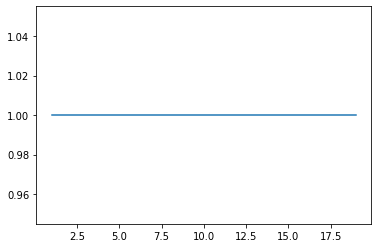

In [179]:
plt.plot(range(1, 20), scores)

(array([ 50.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 142.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

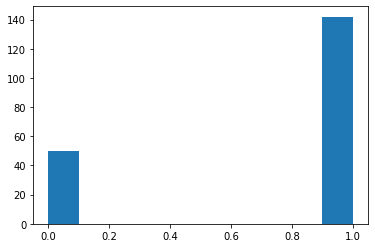

In [180]:
plt.hist(df['pump'])